In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = 'python-data-analysis-master/data/chipotle.tsv'
#read_csv()함수로 데이터를 데이터 프레임 형태로 불러온다.
chipo = pd.read_csv(file_path,sep = '\t')

print(chipo.shape)
print("===============================")
print(chipo.info())

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [3]:
# chipo라는 데이터 프레임에서 순서대로 10개의 데이터를 보여줍니다.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [4]:
print(chipo.columns)
print("===============================")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
RangeIndex(start=0, stop=4622, step=1)


In [5]:
#order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환합니다.
chipo['order_id'] = chipo['order_id'].astype(str)
print(chipo.describe()) # 수치형 피처들의 기초 통계량을 확인

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [6]:
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


In [7]:
#가장 많이 주문한 아이템 Top 10을 출력
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val,cnt) in enumerate(item_count.iteritems(),1):
    print("Top",idx,":",val,cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [16]:
#아이템별 주문 개수를 출력
order_count = chipo.groupby('item_name')['quantity'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: quantity, dtype: int64

In [15]:
#아이템별 주문 총량을 출력
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

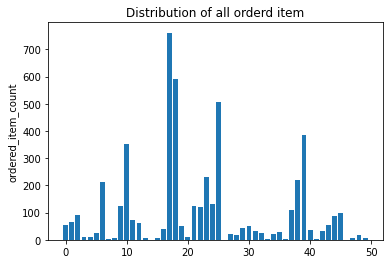

In [27]:
item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt,align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')

plt.show()

In [28]:
# column 단위 데이터에 apply() 함수로 전처리하기
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [30]:
# 주문당 평균 계산금액을 출력
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [32]:
# 한 주문에 10달러 이상 지불한 id를 출력
chipo_orderid_group = chipo.groupby('order_id').sum()
result = chipo_orderid_group[chipo_orderid_group.item_price >= 10]
print(result)
# 결과에서 2,3,4 는 int 형이 아닌 str이기 때문에 뒤로 밀려남

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
...            ...         ...
995              3       24.95
996              4       43.00
997              2       22.50
998              2       10.88
999              5       29.25

[1834 rows x 2 columns]


In [40]:
# 각 아이템의 가격 구하기
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by = "item_price", ascending = True)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Bottled Water,1009,1,NaN,1.09
Canned Soda,100,1,[Coca Cola],1.09
Canned Soft Drink,1003,1,[Coke],1.25
Side of Chips,1002,1,NaN,1.69
Chips,1005,1,NaN,1.99
Chips and Fresh Tomato Salsa,1,1,NaN,2.29
Chips and Tomatillo-Red Chili Salsa,1215,1,NaN,2.39
Chips and Tomatillo-Green Chili Salsa,1,1,NaN,2.39
Chips and Roasted Chili-Corn Salsa,1156,1,NaN,2.39


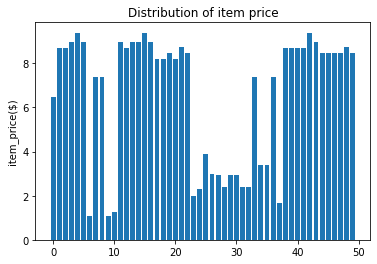

In [44]:
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align='center')
plt.ylabel("item_price($)")
plt.title("Distribution of item price")
plt.show()

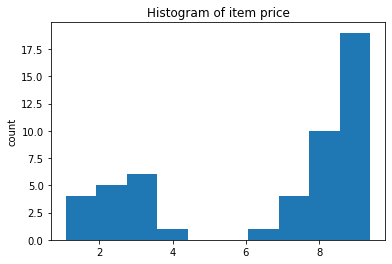

In [47]:
plt.hist(item_price)
plt.ylabel("count")
plt.title("Histogram of item price")
plt.show()